# The Art of Regression with Linear Regression

I know the title is HUGE but it's true. I'm Rishat and let's learn Linear Regression together.

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# A little Recap

In the previous article, I gave you small introduction of `machine learning` and what steps every machine learning model goes through and in this article we will go through the steps to build a `linear regression` model.

The steps are:

1. Get the `DATA`.
    - Define the `features` and the `target`.
2. Prepare/clean the `data`.
3. Split the `data` into `train` and `test` sets.
4. Train the `model`.
5. Evaluate the `model`.
6. Make `predictions`.

So, let's get started.

# Get the Data

Now, the first step is to get the data and as this is the `first algorithm` of `machine learning`, I want to keep it simple and talk more about the algorithm and less about cleaning the data.

So, I want to introduce you to a website called [kaggle](https://www.kaggle.com/) which is a great place to get data for `machine learning` and `data science` projects.

Here you can find real, non-real, artificial, non-aritificial, man made, woman made, child made, computer made data for `machine learning` and `data science` projects. Also, you can do competitions and make friend and also code with your friends.

This website is amazing and the more you spend time on this site the more you get amazed how much a website can do.

So, I found a dataset called [USA Housing](https://www.kaggle.com/datasets/gopalchettri/usa-housing). I don't know if it's real or not. But we can practice some model training with this dataset. You can either download the data from my github repo or you can download it from kaggle yourself(I recommend you download it from [here](https://www.kaggle.com/datasets/gopalchettri/usa-housing)).

So, let's see the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


We have `features` like `Avg. Area Income`, `Avg. Area House Age`, `Avg. Area Number of Rooms`, `Avg. Area Number of Bedrooms`, `Area Population`. So, linear regression is a model that predicts `numeric` values so, we should see which features are numeric and which features are categorical.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


That's weird... 

Every single column is a `float64` data type. But that's okay. Because it makes our work easier. There is no missing data in any of the columns and only one column is `object` data type which is the `address` column. Which I'll drop for this example.

> address is both usefull and useless. Depends on the context. Here a house price is effected by the location of the house, not the address of the house. We can process the address column to get the location of the house. But for now, as we want to focus on learnign the algorithms we will ignore the address column.

So, let's predict some `house price` using `linear regression`.

# Prepare the Data

First, let's drop the `address` column.

In [4]:
data.drop(
    columns=['Address'], inplace=True
)

In [5]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


It's kinda wierd that the number of rooms is a `float64` data type. Rooms and bedrooms should be whole numbers right? But as you can see, the column is not showing the room number of a house. It's showing the average number of rooms in a house in a particular area. So, I will keep it like this. But I know one thing for sure area population should be a whole number so, let's change it to `int64` data type.

In [6]:
data['Area Population'] = data['Area Population'].astype('int64')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   int64  
 5   Price                         5000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 234.5 KB


Now, the data should look like this.

In [8]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354,6.309435e+05


Great!

Now, let's do some exploratory data analysis and see if there is any `anomalies` in the data.

Let's see the distribution of `average area income`.

<Axes: xlabel='Avg. Area Income', ylabel='Count'>

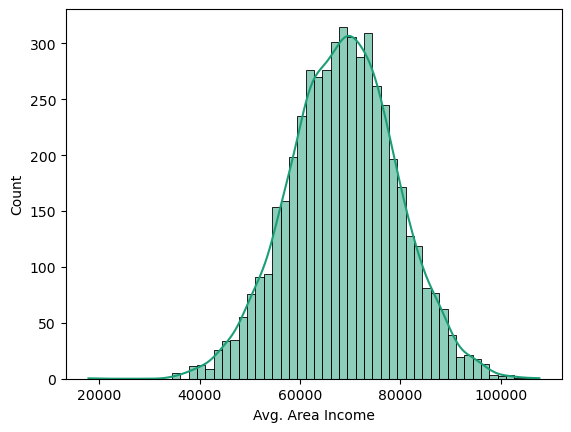

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Dark2')

sns.histplot(data=data,x='Avg. Area Income', kde=True)

Well, it looks normal to me. I don't see any anomalies in the distribution of `average area income` but I want see `average area house age vs area population` distribution.

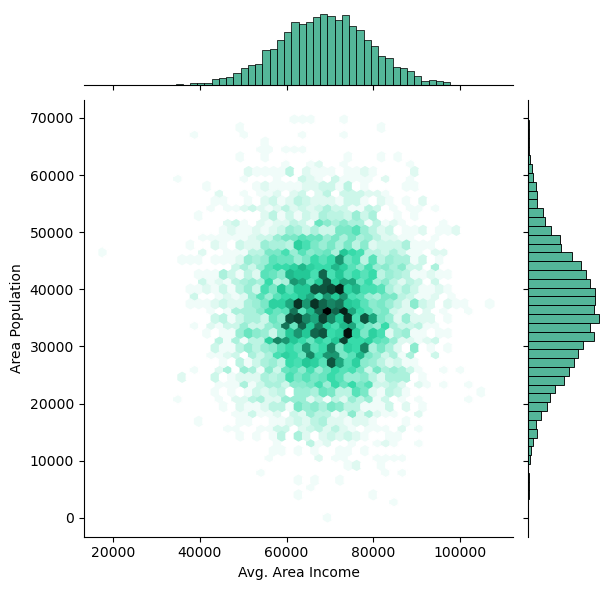

In [10]:
sns.jointplot(
    data=data,
    x='Avg. Area Income',
    y='Area Population',
    kind='hex'
)

Well, that confirms it. The where the population is more `concentrated` the `average area income` is also more concentrated.

That area with 30000-40000 people has a higher `average area income` than the area with 10000-20000 people.

Finally I want to see the whole datasets distribution.

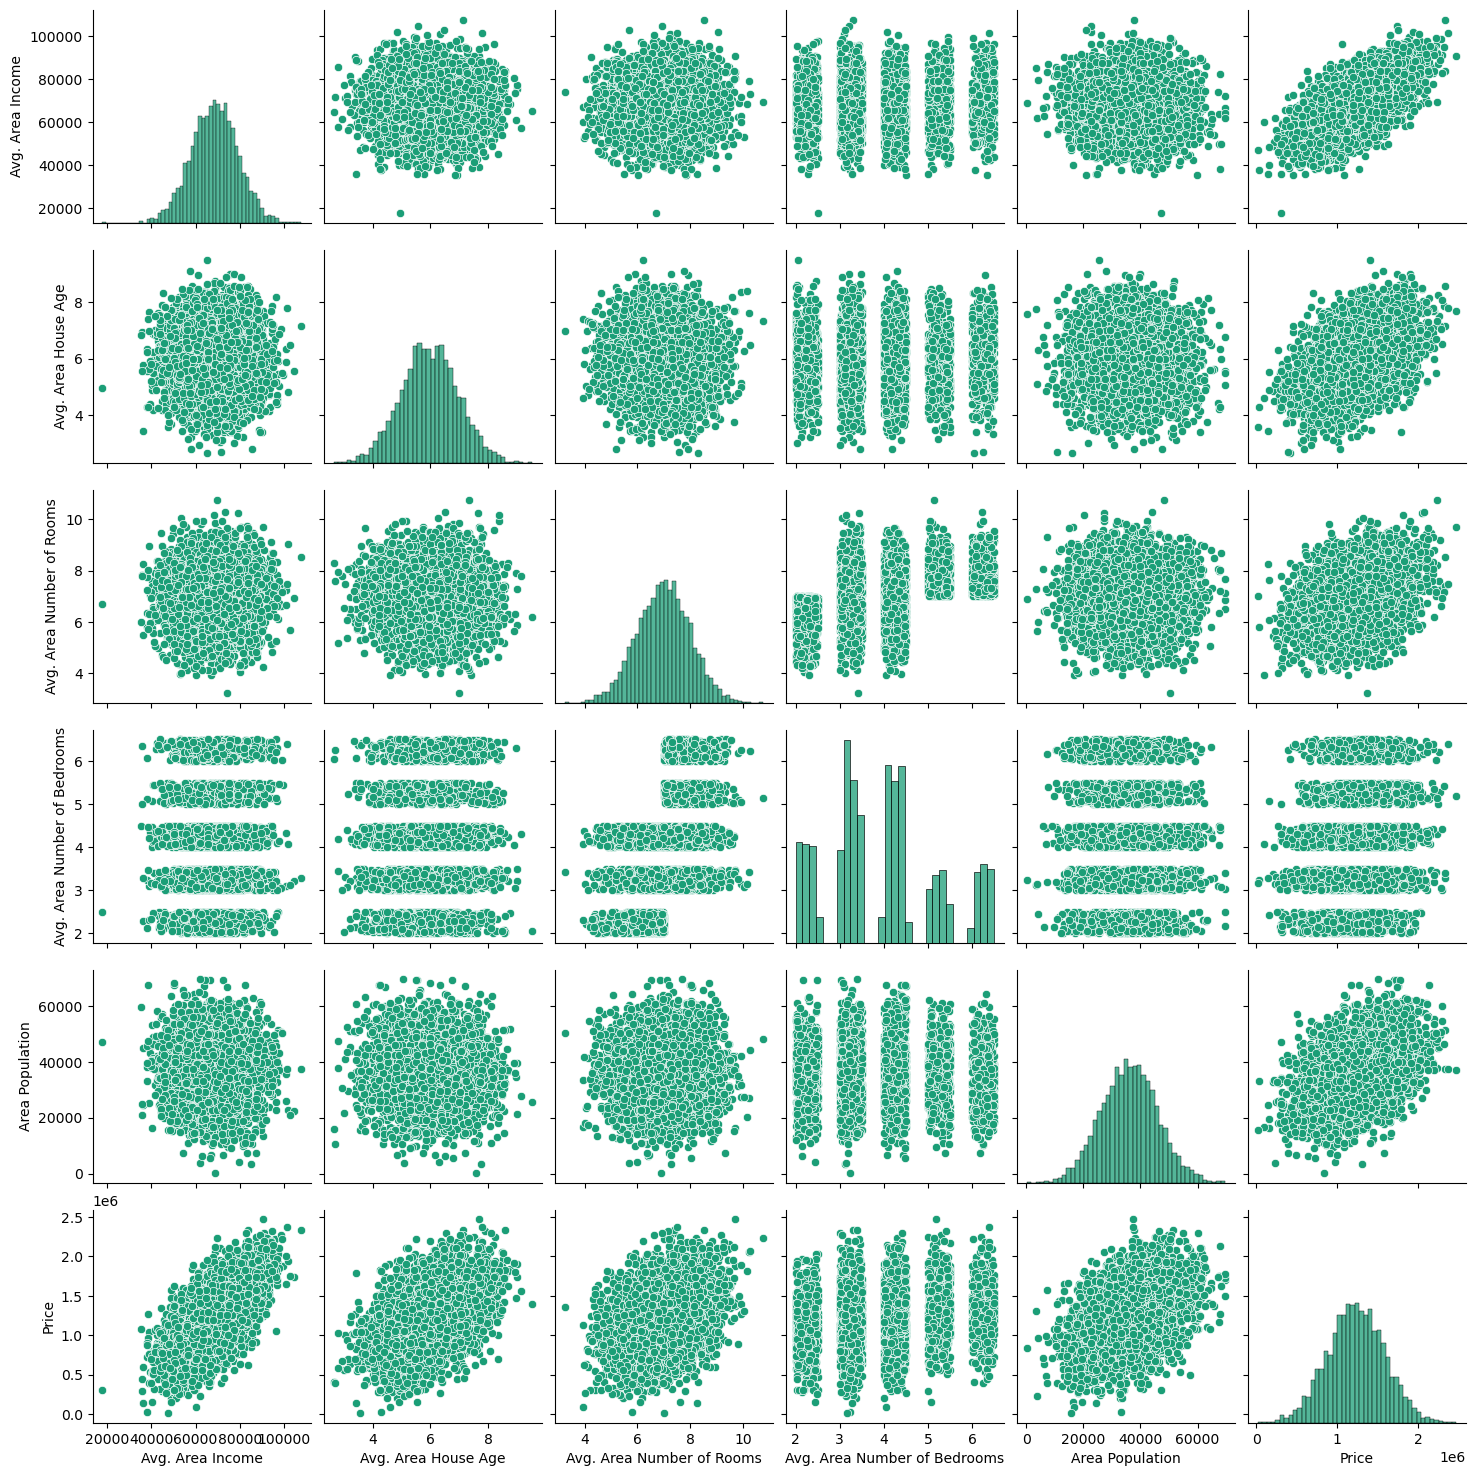

In [11]:
sns.pairplot(data=data)

Everything looks good and normally distributed and I don't see any abnormalities in the data.

So, before I go into making the model I just want to confirm my hypothesis that every column in this dataset is `positively correlated` with the `target`.

We can simply visualize that using a `heatmap`.

<Axes: >

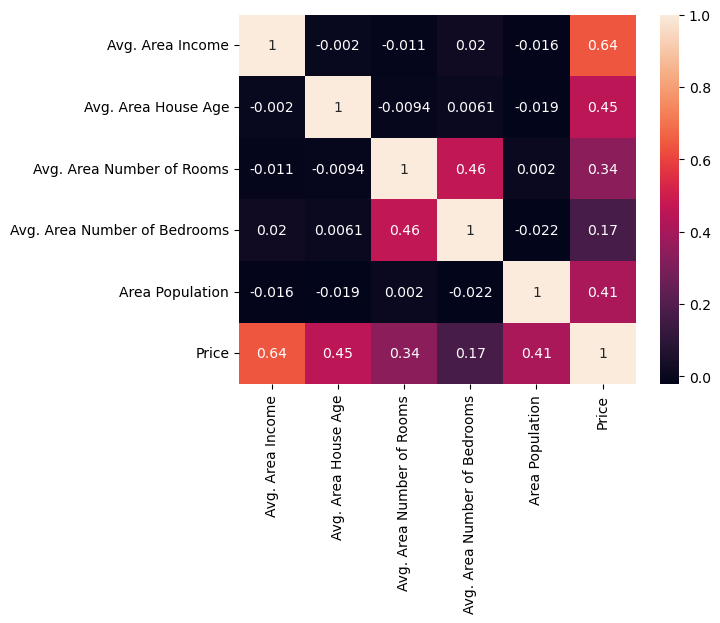

In [12]:
corr = data.corr()

sns.heatmap(corr, annot=True)

YES! It looks like every column in this dataset is `positively correlated` with the `target`. So, I think I can use `linear regression` to predict the `target` from the `features`.

> You can see that most of the columns are `negetively correlated` and it's because every column is containing average values of a particular area. So We have to think about the relation betweem two columns with respect to the area. So, even though the distributions look normal the colums can be negetively correlated. And these numbers are so small that they are comparable to zero. But the main thing is the column are effecting the target.

Now, let's get into the fun.

# Split the Data

Now, the last step before we train the model is to split the data into `train` and `test` sets.

So, how do we do that?

There is a library called `scikit-learn`, maybe the best the and the only library that you might need for almost every `machine learning` model.

> Scikit-Leanr is a Machine learning library with a cast collection of methods to prepare, train, test and deploy models. It is built with Python and NumPy and can seamlessly integrate with other libraries and frameworks like pandas.

We will use this library to do all the heavy lifting for us.

So, let's install the library.

```bash
conda install scikit-learn
```

You can also install it by running the following command:

```python
pip install scikit-learn
```

And let's import the library.

Now, as I said earlier this library has a lot of functions that we can use and one of them is `train_test_split` which is used to split the data into `train` and `test` sets.

> train_test_split is a function that takes the `features` and the `target` as arguments and returns four values: `X_train`, `X_test`, `y_train` and `y_test`.

> `X` represents the `features` and `y` represents the `target`. `X_train` and `X_test` are the training and testing `features` respectively and `y_train` and `y_test` are the training and testing `target` respectively.

So, first let's make two variables `X` and `y` which will contain the `features` and the `target` respectively.

In [13]:
X = data.drop(
    columns=['Price']
)
y = data['Price']

And we now we can use the `train_test_split` function to split the data into `train` and `test` sets.

In [14]:
# train test split is a function of the model selection module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


And we have our `train` and `test` sets.

Before we go into training the model, let's understand the `train_test_split` function a little bit more.

> train_test_split does somethings before actually splitting the data into `train` and `test` sets.

1. It `shuffles` the data.

Now, why do we need to shuffle the data?

The simple answer is to prevent `bias` in the model. If the data is directly split into `train` and `test` sets, there is a high possibility that a model will be biased towards the data that is in the `train` set.

Let's say you have a target column like this [1,1,1,1,2,2,2,2,3,3]. And you split the data into `train` and `test` set with train_size=0.8. That means the first 80% of the data will be in the training set. So, in this case the last 20% of the data which is just `3` will be left out and the model will trained on `1 and 2`.

> `train_size` is used to define the size of the split. The default value is 0.75 but if you want to change it you can do it by passing it as an argument to the `train_test_split` function. So, if you pass .7 as the `train_size` then the first 70% of the data will be in the `train` set and the last 30% will be in the `test` set.

So, Now you see why suffle is important.

2. Every time you run the `train_test_split` function, you will get different `train` and `test` sets.

This is because of the `random_state` argument. This is used to suffle the data and every time it changes it's value and that's it is a good practice to set a value for the `random_state` argument so that you can recreate the model.

And now that we have our `train` and `test` sets, let's learn about `linear regression`.

# Linear Regression

Our data is prepared for training and now let's learn about the model that will be used to train the data.

Linear Regression is a very very very simple(mot at all, don't search linear regressing books on google) model that will be used to train the data.

Let's say you have a data set like this:

| Feature 1 | Feature 2 | Target |
|----------|----------|----------|
| 1 | 2 | 3 |
| 2 | 3 | 4 |
| 3 | 4 | 5 |
| 4 | 5 | 6 |
| 5 | 6 | 7 |
| 6 | 7 | 8 |
| 7 | 8 | 9 |
| 8 | 9 | 10 |
| 9 | 10 | 11 |
| 10 | 11 | 12 |

Now, what can we do to predict the `target` from the `features`?

If we plot the target versus the features, let's see what we see.

In [15]:
example_df = pd.DataFrame(
    {
        'Feature 1': np.arange(1, 11),
        'Feature 2': np.arange(2, 12),
        'Target' : np.arange(3, 13)
    }
)

example_df

,Feature 1,Feature 2,Target
0,1,2,3
1,2,3,4
2,3,4,5
3,4,5,6
4,5,6,7
5,6,7,8
6,7,8,9
7,8,9,10
8,9,10,11
9,10,11,12


I just made the same data set as above but now I want to plot it.

<Axes: xlabel='Feature 1', ylabel='Target'>

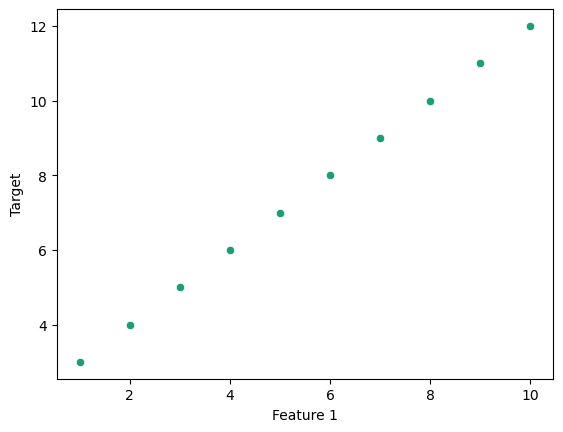

In [16]:
sns.scatterplot(
    data=example_df,
    x='Feature 1',
    y='Target',
)

As you can see the `target vs feature 1` is a straight line.

So, next values should be in that straing line right?

This is what linear regression does.

Linear regressing algorithm `finds a straight line` that best `fits` the data.

> Whena ml algorithm finds the pattern of the data, it's called `fitting` the data.

We can also, see the regressing like of `target vs feature 1` with seaborn.

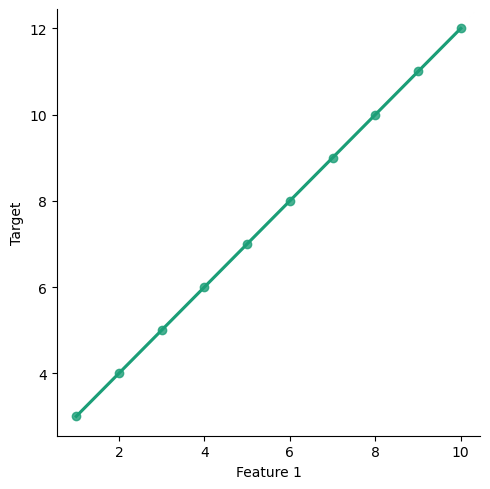

In [17]:
sns.lmplot(
    data=example_df,
    x='Feature 1',
    y='Target'
)

This line is called the `regression line` and the algorithms main task is to find a straing line that has the minimum `error` or the `residuals` between the data and the regression line.

So, for example, I'll adjust our dataset for more realistic view.

In [18]:
new_target_value = example_df['Target'].copy()
np.random.shuffle(new_target_value)

example_df['Target'] = new_target_value
example_df

/tmp/ipykernel_467970/3472451870.py:2: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(new_target_value)


,Feature 1,Feature 2,Target
0,1,2,9
1,2,3,12
2,3,4,11
3,4,5,8
4,5,6,6
5,6,7,5
6,7,8,3
7,8,9,7
8,9,10,4
9,10,11,10


I suffled the target values and now I want to plot it.

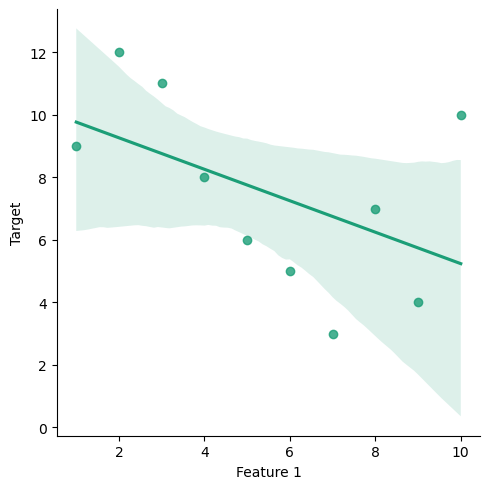

In [21]:
sns.lmplot(
    data=example_df,
    x='Feature 1',
    y='Target'
)

Now, you have a better view of what is going on.

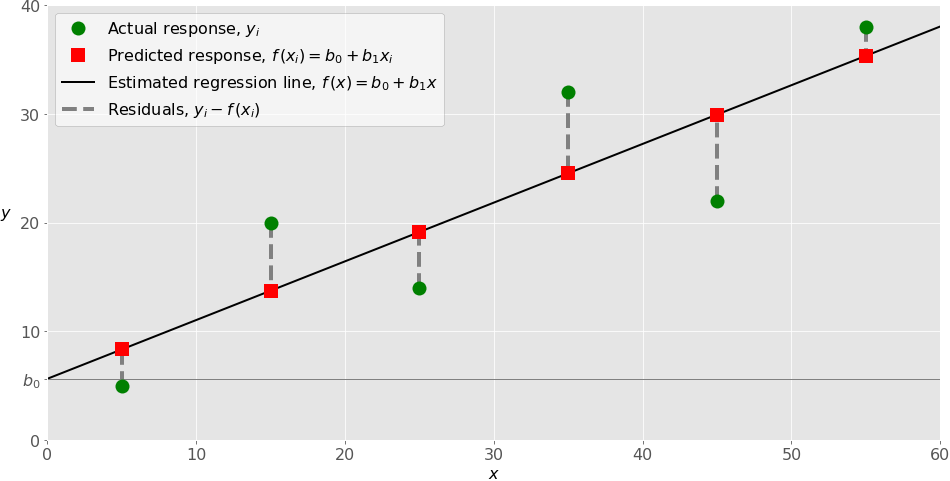

The algorithm has one task, to find a straing line that has the minimum `error` from every data point.

And the equation to that line is:

$$
y = \beta_0 + \beta_1 x
$$

Just a fancy way to write `y = mx + b` where `m` is the slope and `b` is the intercept.

The algorithm will try to find the `slope` and the `intercept` of the regressing line that will be at minimum error distance from every data point.

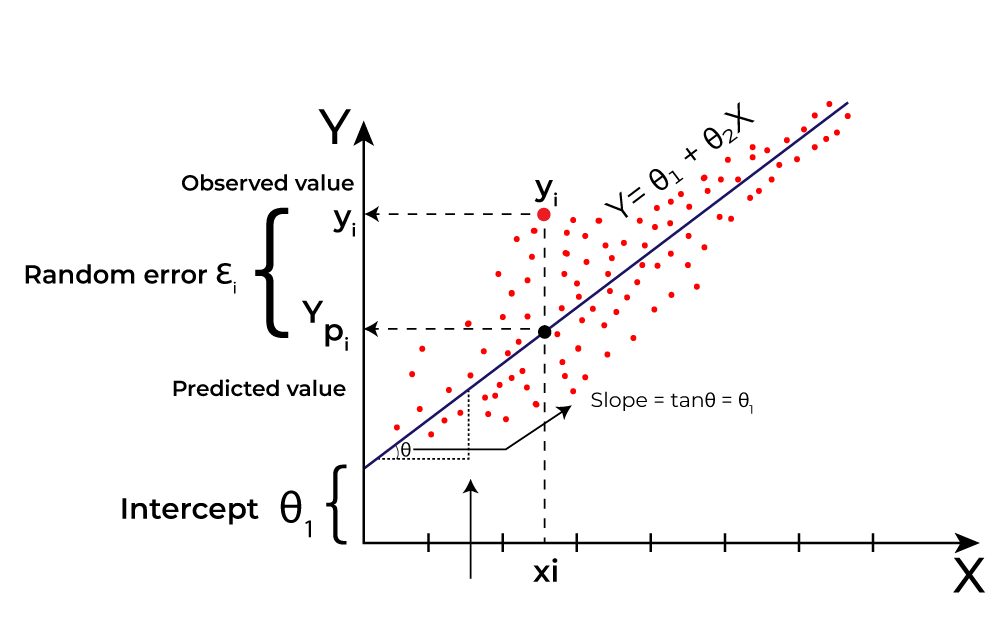

`Linear Regression` is the statistical method that finds a straight-lien relationship between inputs and outputs.

_Linear regression tries to draw the line that best describes the relationship between the inputs and the outputs._

I hope you got the gist of it.

Now let's train the model.

# Training the Model

We already have the train test sets, let's train the model.

Scikit-learn already has a function called `linear regression` that we can use to train the model.

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

And we have our model in hand and ready to train.

In [23]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We have to use the `fit()` method and inside the mathod first we pass the `features` and then the `target` values.

For us, that's the `X_train` and `y_train` variables.

And just like that the model has been trained.

And As I explained earlier the `linear regression` model has one task, to find a straing line that has the minimum `error` from every data point.

To describe that line we need the `slope` and the `intercept` values.

We, can now use `coef_` and `intercept_` attributes to get those values.

In [24]:
model.coef_

array([2.16522070e+01, 1.64666422e+05, 1.19624079e+05, 2.44034240e+03,
       1.52703170e+01])

And it'll returns a numpy array with the `slope` of the line for each `feature`.

We can easily format this into a datafram to get a better view.

In [26]:
pd.DataFrame(
    index=X_train.columns,
    data=model.coef_,
    columns=['Coefficients']
)

,Coefficients
Avg. Area Income,21.652207
Avg. Area House Age,164666.421931
Avg. Area Number of Rooms,119624.079051
Avg. Area Number of Bedrooms,2440.342401
Area Population,15.270317


In [25]:
model.intercept_

np.float64(-2635065.488492687)

And the `intercept_` attribute returns the `intercept` of the line.

Now, as the model is trained we can use it to make predictions.

# Making Predictions

We can use the `predict()` method to make predictions.

In [27]:
predictions = model.predict(X_test)
predictions

array([1308581.01071068, 1237042.56863874, 1243434.84263746,
       1228904.57446275, 1063321.17014634, 1544053.51357563,
       1094770.94545506,  833283.10748247,  788410.79652598,
       1469709.83960968,  671735.80497133, 1606819.1526406 ,
       1004169.54794027, 1796802.69031365, 1288561.01354532,
       1087784.17519401, 1423071.07868596, 1078181.39608634,
        802281.66179687,  930766.72405962, 1134823.1052443 ,
        916392.20953954, 1489976.294751  , 1284582.46134275,
       1582072.99980339, 1132520.43029572, 1089884.66029928,
        974517.98968995,  924052.81272256, 1740767.01023142,
       1286475.06419415, 1621288.83354309, 1435258.03072299,
       1234017.81013581, 1485430.66757187, 1718332.50964031,
       1538952.65158026,  777112.6383753 , 1765196.3317792 ,
       1175964.84898443, 1553712.23269422,  897710.56326408,
       1371047.3777589 ,  845285.15158192, 1201028.7454289 ,
       1133292.79503028, 1363121.8913513 , 1449818.91097458,
       1574368.95430037,

AWell, that's a lot of predictions.

We cannot get any usefull information from them. Let's try to visualize them.

<Axes: xlabel='Price'>

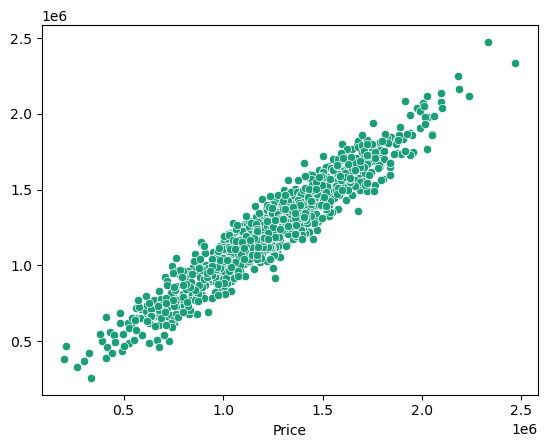

In [30]:
sns.scatterplot(
    x=y_test,
    y=predictions,
)

That't good we see that the predictions are close to a straight line. That is what we want and we to confirm this I'll see the `error/residuals` distribution of the predictions.

<Axes: xlabel='Price', ylabel='Count'>

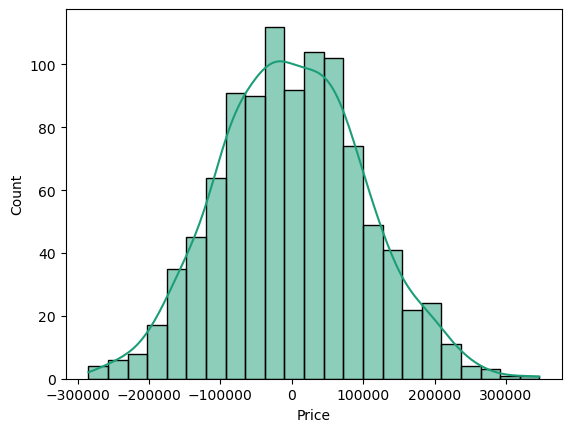

In [32]:
sns.histplot(
    data=(y_test - predictions),
    kde=True
)

And this is what you want to see.

WHen you train a model after prediction the models `error` distribution should be normally distributed. If there is a abnormality in the `residual` distribution then that's a sign that the model is overfitting.

So, this also means that `linear regression` is the correct model for this dataset.

So, let's evaluate.

## Evaluation

We will use `mean absoulute error`, `mean squared error` and `root mean squared error` to evaluate the model.

In [34]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE) # just square root of MSE

In [35]:
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

MAE: 80878.79115229756
MSE: 10088963923.461655
RMSE: 100443.83467123134


As you can see the `RMSE` and the `MAE` are close to each other, not much but this will do. These matrics are also refered to as `loss functions` and `error functions`.

The loss is `80,878` in this context of house price that is in `millions` the prediction is not that far off. I guess this is a good model.

And that's it for linear regression.

> Explaining ML models are a challenge without visualization or simulations. I tried my best to explain linear regression in a simple way. I'm not perfect but I hope you got the gist of it.

# Final Words

Mathematics is the key to be a good `ML engineer`. So, if you are passionate about machine learning, you should open up you mathematics book and god through the `matrix, linear algebra and statistics` NOW!

I hope you like this article. If you did that leave a like and share it with your friends.